# 8/17

- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법  
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름  
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요  
- 1변량 데이터의 t검정  
    - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
     
     - t값 = (표본평균-모평균)/표준오차  
     - t값이 크면 유의미한 차이가 있다고 판단  
- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표  
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단  
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

##### 귀무가설 : 두 모집단의 평균간의 차이는 없다.
##### 대립가설 : 두 모집단의 평균간에 차이가 있다.  
  
  - 기각역 : 귀무가설이 기각되는 구간
  - 채택역 : 귀무가설이 채택되는 구간
  - 유의수준 : 5%, 1%.. 기각역에 들어가는 확률?
  - 임계값 : 경계선상의 값
  - p-value : 검정통계량보다 왼쪽에 있는 영역의 면적
  - 검정통계량 : 검정에 사용되는 통계량  
    
  검정통계량(t값)이 기각역에 위치 = 검정통계량이 유의수준(임곗값)보다 작음 -> 귀무가설 기각  
  p값이 유의수준보다 작음 -> 귀무가설 기각  
  

In [151]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [153]:
# t검정 : 귀무가설 : 과자의 무게는 50g 이다,
jfood = pd.read_csv('dataset/5_8_jfw.csv')
jfood # 오징어땅콩무게

,weight
0,58.529820
1,52.353039
2,74.446169
3,52.983263
4,55.876879
5,67.659849
6,47.726141
7,50.266907
8,56.500826
9,52.361040


In [154]:
# 표본평균
mu = np.mean(jfood)
mu

weight    55.384966
dtype: float64

In [155]:
# 자유도
df = len(jfood)-1
df

19

In [156]:
# 표준오차 = 표준편차/
sigma = np.std(jfood,ddof=1)
se = sigma / np.sqrt(len(jfood))
se

weight    1.957928
dtype: float64

In [157]:
# t_value = (표본평균-모평균)/표준오차
t_value = (mu-50)/se
t_value

weight    2.75034
dtype: float64

In [158]:
# p값(유의확률)이 유의수준 0.05보다 작으면 귀무가설 기각
alpha = stats.t.cdf(t_value, df=df)
(1-alpha) * 2
## 유의수준 0.05보다 작음 -> 대립가설 -> 50g이 아니다.(50g보다 크다 X)

array([0.01272559])

In [159]:
# t검정
# p값(유의확률)이 유의수준 0.05보다 작으므로 귀무가설 기각
# 과자의 무게는 50g이 아니다라고 할 수 있다.
stats.ttest_1samp(jfood,50)
# t통계량 2.75, p_value = 0.0127

Ttest_1sampResult(statistic=array([2.75033968]), pvalue=array([0.01272559]))

- 대응표본 t검정 : 약을 먹기 전과 후의 체온의 차이를 보는 경우 사용
- 독립표본 t검정 : 큰 바늘로 낚은 물고기의 길이가 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용. welch 근사법이라고 불리는 방법을 이용하여 p값 계산(welch검정)

In [163]:
pt_data = pd.read_csv('dataset/5_9_ptt.csv')
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [164]:
before = pt_data.query('medicine=="before"')['body_temperature']
after = pt_data.query('medicine=="after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after-before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [165]:
# 평균값이 0과 다른지 검정
# 귀무가설을 기각하므로 유의미한 차이가 있다고 주장할 수 있다.
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [88]:
# 독립표본 t검정
# 평균치
mean_bf = np.mean(before)
mean_af = np.mean(after)
# 분산
sigma_bf = np.var(before, ddof=1)
sigma_af = np.var(after, ddof=1)
# 샘플사이즈
m = len(before)
n = len(after)
# t값
t_value = (mean_af-mean_bf)/np.sqrt(sigma_bf/m+sigma_af/n)
t_value

3.1557282344421034

In [89]:
# 귀무가설을 기각하고 유의미한 차이가 있다고 판단
# equal_var = False : 분산이 다르다고 가정한 t검정(welch검정)
stats.ttest_ind(after, before, equal_var = False) # ind -> independent 독립표본에서는 이거 사용

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

- 카이제곱 검정(chi-squared test) 또는 $x^2$검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법임.  
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.  
- 독립성 검정과 동질성 검정은 분할표와 가설설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상의 모집단에서 표본 추출하여 분할표를 만듦.  
[독립성 검정 사례] 어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 분할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정  
[동질성 검정 사례] 세 가지 토양의 종류(진흙, 모래, 로움)에 따른 새로운 잡종 식물의 성장상태를 알기 위해 진흙 65군데, 모래60군데, 로움60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정

In [167]:
# 카이제곱 검정 : 독립성 검정의 분할표 및 가설 설정 -> 두 변수 사이 연관성 확인
# 귀무가설 : 두 범주형 변수 사이에 연관이 없다.(독립이다.)
# 대립가설 : 두 범주형 변수 사이에 연관이 있다.(종속이다.)
click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [168]:
# 분할표
cross = pd.pivot_table(data=click_data, values='freq',
                       index='color',columns='click',aggfunc='sum')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [92]:
# 카이스퀘어 통계량, p값, 자유도, 기대도수표
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
# p값이 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미 하게 변한다고 판단
stats.chi2_contingency(cross, correction=False) # 보정 안함

# 카이스퀘어 6.6666...
# p값 0.00982...
# 자유도 1
# 기대도수표 [[25., 225.],[5.,45.]] -> 전부 5 이상임

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

수리모델 : 현상을 수식으로 표현한 모델. 맥주 매상 = 20 + 4 * 기온  
  
- 확률모델 : 확률적인 표현이 있는 모델. 확률분포를 사용. 맥주 매상 ~ N(20 + 4 \* 기온, $시그마^4$).  
맥주 매상은 20 + 4 \* 기온+e(e = 오차)이며, e ~ N(0,$시그마^4$)를 따른다. 맥주 매상은 20 + 4 \* 기온에 대해 노이즈 평균이 0, 분산이 $시그마^4$인 정규분포를 따르며 노이즈가 있다는 의미  
- 통계모델 : 데이터에 적합하게 구축된 모델, 맥주 매상 ~N(10+5\*기온, $시그마^4$) 확률모델의 구조를 생각하면서 데이터에 적합하게 파라미터를 조정해가며 통계모델을 구축  
- 확률분포와 통계모델 : 모집단에서 랜덤 샘플링을 하여 포본을 얻는 행동은 모집단 분포를 따르는 난수를 발생시키는 것과 같다. 통계모델을 사용하면 확률분포의 모수(파라미터)의 변화 패턴을 명확히 할 수 있다. 즉 언급한 모델은 '기온이 올라가면 맥주 매상의 평균값이 증가한다'와 같은 구조라는 것을 알 수 있다. 통계모델에 의한 예측은 기온이라는 독립변수를 얻는 것이 조건인 매상의 확률분포 즉 조건부 확률분포의 형태로 얻을 수 있으며 예측값의 대표값은 조건부 기댓값을 사용한다. 기온이 10˚C일 때의 매상 예측은 기댓값이 60, 분산이 시그마2인 정규분포를 따르는 매상 데이터를 얻을 것이라는 주장이 된다.  
- 모델링에 초점 : 날씨와 세일이라는 2가지 영향을 동시에 평가하는 통계모델을 만든다면 더욱 올바른 효과를 분석할 수 있다. 통계모델은 잠정적인 세계의 모형으로 · 통계모델을 구축 시 파라미터의 추정을 틀리게 하면 올바른 해석을 할 수 없다.
- 분석에 사용하는 데이터에 문제가 있는 경우도 올바른 모델을 만들 수 없다. 
- 통계모델에 사용되는 파라미터를 계수라고 하는 반면 머신러닝에서는 가중치라고 표현

In [93]:
!pip install statsmodels

In [94]:
beer = pd.read_csv("dataset/7_1_beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


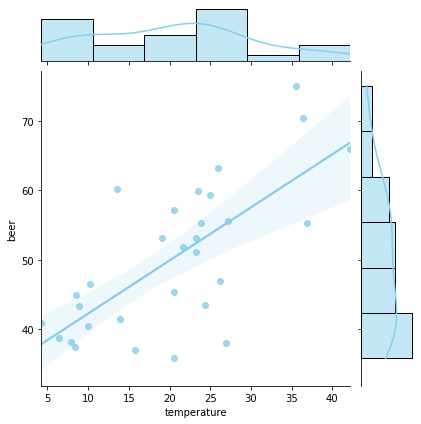

In [95]:
sns.jointplot(x='temperature', y='beer', data=beer, kind='reg', color='skyblue')

In [96]:
lm_model = smf.ols(formula = "beer ~ temperature",
                  data=beer).fit()

In [97]:
lm_model.summary()

## Method : 최소자승법
## No.Observations : 관측치?
## Df Residuals : 잔차 (sample size(30)-parameter(2))
## Df Model : 독립변수1의 수
## R-squared : 설명력(결정계수)
## Adj.R-squared : 수정결정계수
## F-statistic : F통계량 -> F값 클수록 오차에 비해 모델효과가 크므로 좋음.
#### F비 = 모델 효과의 분산크기 / 오차의 분산 크기(분산을 이용한 분석이기 때문에 분산 분석이라고 함. 아노바)
#### F통계량이 0.05보다 작으므로 유의미함.
## Log-Likelihood : 최대로그우더, 가능도 함수의 로그
## AIC : 아카이케 정보 기준, 낮을수록 좋음(낮으면 모형의 적합도가 높은 것을 의미). 변수선택할 때 사용
## BIC : 

## coef :
## std err : 
## t :
## P>|t| : 
## 신뢰구간 :

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        23:15:06   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


해석 : 기온이 맥주 매상에 영향을 미친다는 것을 알 수 있음  
- std err : 계수의 표준오차
- P>|t| : 귀무가설을 계수의 값이 0이라고 했을 때의 p값
- 95% 신뢰구간의 하측신뢰한계와 상측신뢰한계
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
- Df Models : 사용된 독립변수의 수
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수
    - 결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표
    - 모델에 의한 추측치가 종속변수의 실젯값과 일치하면 R-squared는 1이 됨
    - 종속변숫값의 변동 크기를 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합을 분해할 수 있는데 결정계수는 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 할 수 있음
- F-statistic, Prob(F-statistic) : 분산분석 결과
    - 분산분석은 평균값의 차이를 검정하는 방법
    - 분산분석을 사용할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는 지 검정할 경우임
    - 모집단이 정규분포를 따르는 데이터에 대해서만 적용. 수준 사이의 분산값이 다르지 않다는 조건도 충족해야 함
    - F비 = 효과의 분산 크기 / 오차의 분산 크기. F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단
    - 분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석 또는 ANOVA라고 부름
    - F분표의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05 이하가 되면 귀무가설을 기각함
- Log-Likelihood : 최대로그우도
- AIC : 아카이케 정보 기준
- BIC : 베이즈 정보 기준
- Prob(Omnibus), Prob(JB)는 잔차의 정규성에 대한 검정결과
- 귀무가설 : 잔차가 정규분포를 따른다, 대립가설 : 잔차가 정규분포와 다르다.
- p값이 0.05보다 크다고 해도 검정의 비대칭성이 있으므로 정규분포라고 주장할 수 없음
- Skew(왜도) : 히스토그램의 좌우비대칭방향과 그 정도를 측정하는 지표.
- 왜도가 0보다 크면 오른쪽 자락이 길어짐. 정규분포의 왜도는 0
- Kurtosis(첨도) : 히스토그램의 뾰족함을 측정하는 지표. 정규분포의 첨도는 3
- Durbin-Watson : 잔차의 자기상관을 체크하는 지표. 2 전후라면 문제 없다고 판단.
- 시계열데이터를 분석하는 경우 반드시 이 지표를 체크. 잔차에 자기상관이 있으면 계수의 t검정 결과 신뢰 못함
- Durbin-Watson 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법 등의 사용 검토 필요

[과제]  
Q. 선형 모델을 생성하고 summary를 출력한 후 모델에 대한 통계지표들을 해석하세요.  
    
df = pd.read_csv('dataset/auto-mpg.csv')  
df_mw = df[['mpg','weight']]  
df_mw.head()  

In [98]:
null_model = smf.ols('beer ~ 1',data=beer).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                nan
Time:                        23:15:06   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
null_model.aic

227.94194972563105

In [100]:
lm_model.aic

# null_model 보다 aic가 낮아짐 -> 유의미함

208.9090293557544

In [101]:
lm_model.predict() # 예측

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [102]:
# 기온이 0도일 때 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [103]:
# 기온이 20도일 때 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [104]:
# 파라미터값
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [105]:
# beta : 절편
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.918767010950525

In [106]:
# 잔차계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [107]:
# 잔차 = 실제값 - 예측값
y_hat = beta0 + beta1 * beer.temperature
# 실제값 = beer.beer 
# 예측값 = y_hat
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [108]:
# 결정계수
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat-mu)**2)/np.sum((y-mu)**2)

0.5039593230611872

In [109]:
# 수정 결정계수 : 독립변수의 수가 늘어나면 결정계수가 커지는 경향을
# 조정하기 위하여 패널티 부여
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid**2) / (n-s-1)) /
    (np.sum((y-mu)**2) / (n-1)))

0.48624358459908523

In [110]:
lm_model.rsquared_adj

0.48624358459908523

In [111]:
# 종속변수의 변동 크기는 모델로 설명 가능한 변동과 설명 못하는
# 잔차제곱합으로 분해할 수 있다.

np.sum((y-mu)**2) # 종속변수의 변동

3277.1146666666655

In [112]:
np.sum((yhat-mu)**2) + sum(resid**2)

# 모델로 설명 가능한 변동 : np.sum((yhat-mu)**2)
# 모델로 설명 못하는 잔차 제곱합 : sum(resid**2)
# 둘을 더해도 위에서 구한 종속변수의 변동과 같음

3277.1146666666705

<AxesSubplot:ylabel='Density'>

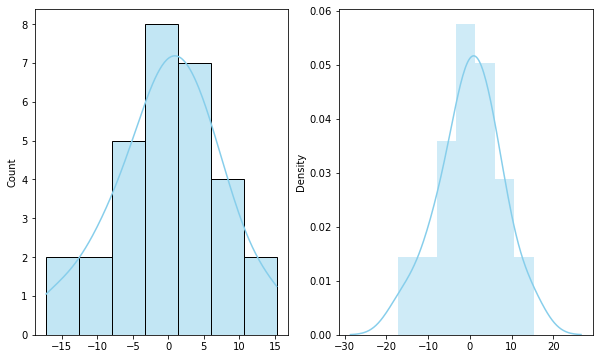

In [113]:
# 잔차 그래프
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(resid, color='skyblue', kde=True, ax=ax1)
sns.distplot(resid, color='skyblue', ax=ax2)

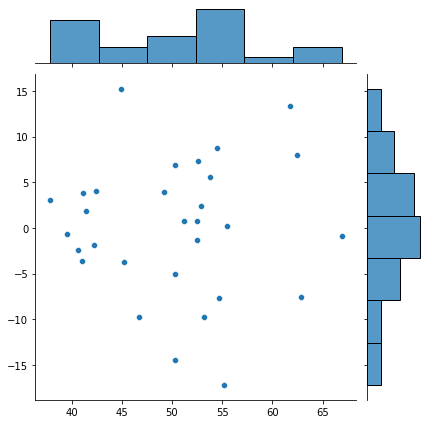

In [114]:
# 잔차의 산포도 : x축 적합도, y축 잔차
sns.jointplot(lm_model.fittedvalues, resid)

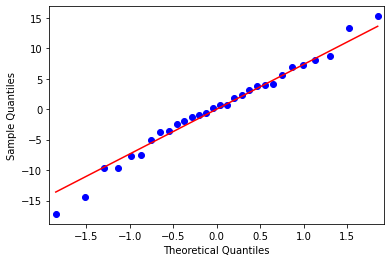

In [115]:
# Q-Q플롯 : 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
# 일치하면 정규성이 있음
fig = sm.qqplot(resid, line='s') # 빨간 선이 이론상의 분위점을 나타내고, 파란 점은 실제 데이터를 찍은 것

### 분산분석  
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함  
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 검정하는 방법
- 평균값의 차이 검정은 t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포를 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
- "온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?"와 같은 과제를 분석
- 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다.  
이 중에서 다른 치료법보다 나은 치료방법이 있는가?
- 한 제조업체는 저구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법보다 나은가?
- 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?

분산분석에는 일원분산분석과 이원분산분석이 있음.  
두 개 이상의 그룹이 있으면 분산분석(아노바) 사용, 2개까지는 t검정 사용
(독립변수 3 개 아님, 그룹임. 뭔말 ㅡㅡ?????????????//)

종속변수는 주로 범주형, 독립변수는 주로 연속형????????

### 분산분석
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 거정하는 방법
- 평균갑의 차이 검정은  t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포를 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
       
       ex)
       - "a온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?" 와 같은 과제를 분석함
       - 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이중에서 다른 치료법보다 나은 치료 방법이 있는가?
       - 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법보다 나은가?
       - 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?
       - 독립변수는 정성적이거나 정량적일 수 있으며 예에서 온도는 정량적이며 약은 정성적임
       - 온도가 인자라고 하면 10도, 20도, 30도와 같이 몇 개의 값을 가지며 인자를 구성하는 몇 가지 특성을 수준이라 함
       
- 각 수준은 독립적인 모집단을 구성하고 이에 따라 확률변수가 정의됨
- 분산분석은 서로 다른 수준을 갖는 모집단들을 대상으로 그들의 평균에 의미가 있는 차이가 있는지 없는지를 검정
- 인자가 하나인 분산분석을 일원분산분석, 둘이면 이원분산분석, 셋 이상이면 통틀어 다원분산분석이라고 함.
- 집단 또는 수준은 동일한 독립변수 내의 묶음을 의미한다. "씨리얼의 종류" 라는 독립변수가 있다면 코코볼, 콘푸로스트, 오레오 오즈는 그 아래의 세 수준이 될 수 있다. " 칼로리"라는 독립변수의 경우에는 가당과 무가당 두 가지 수준을 가질 수 있음.
- 일원분산분석에서는 하나의 인자의 수준만 처리가 되나 이원분산분석에서는 두 인자의 수준들이 조합되어 처리됨
- 다음의 가정에 기초가 된다

        -모든 모집단의 확률변수는 정규분포를 갖는다
        -모든 모집단의 확률변수의 분산은 sigma squared로 동일하다
        -표본은 무작위로 추출되면 모든 표본은 서로 독립적이다.

검정의 다중성
- 검정을 반복함으로써 유의미한 결과를 얻기 쉬어지는 문제를 검정의 다중성이라 함
- 검정을 반복하면 귀무가설이 기각되기 쉬어지고 1종 오류를 저지를 확률이 높아집니다.
- 맑음, 비, 흐림의 세가지 수준으로 매상이 달라지는지 검정할 때 맑음 대비 비, 비 대비 흐림, 맑음 대비 흐림의 3가지 조합으로 t검정을 실시하면 검정의 다중성 문제가 발생  
- 반면 분산분석을 수행하면 맑음이나 비와 같은 개별 카테고리를 보는 것이 아니라 날씨에 따라 매상이 다른지 여부를 한번의 검정으로 판단

분산분석의 직감적 사고방식 : F비
- 귀무가설 : 수준간의 평균값에 차이가 없다. / 대립가설 : 수준간의 평균값에 차이가 있다.
- 수준이란 날씨, 물고기 종류 등과 같은 카테고리 변수를 의미
- 분산분석에서는 데이터의 변동을 오차와 효과로 분리하여 F비 계산. F비 = 효과의 분산크기 / 오차의 분산 크기
- 효과의 크기를 군간 변동, 오차의 크기를 군내변동이라 하고 데이터의 분산을 2개의 변동으로 나눈 뒤 그 비율을 취한 것을 통계량으로 사용하여 검정 시행
- 분산의 비율을 취한 통계량으로 검정을 시행하므로 분산분석(ANOVA)이라고 부름
- F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단
- F분포의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05 이하가 되면 귀무가설을 기각

In [116]:
# 샘플 데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({
    "beer":beer,
    "weather":weather
})

<AxesSubplot:xlabel='weather', ylabel='beer'>

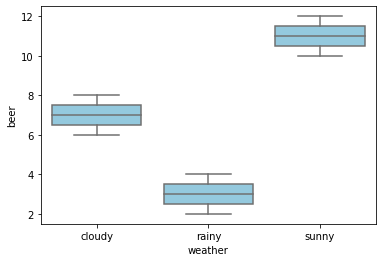

In [117]:
# box plot
sns.boxplot(x="weather",y="beer",
           data=w_beer, color='skyblue')

In [118]:
# 날씨별 매상의 평균치
w_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [119]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11]

In [120]:
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음
mu_effect = np.mean(effect)
sq_model = np.sum((effect-mu_effect)**2)
sq_model # 이게 군간변동
# 각 그룹의 평균을 구해서 평균의 평균들을 뺀 값들의 제곱의 합

64.0

In [121]:
resid = w_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [122]:
# 군내변동
sq_resid = np.sum(resid**2) # 오차의 평균값은 0이므로 평균값빼주는거 생략
sq_resid
# 잔차 스퀘어한거의 합을 구하면 군내변동

6

In [123]:
df_model = 2 # 군간변동의 자유도(수준의 종류 수에 따라 좌우 : 수준(3) - 1)
df_resid = 3 # 군내변동의 자유도(샘플사이즈와 수준의 종류 수에 따라 결정 : 샘플(6) - 수준(3)) # 잔차의 자유도

In [124]:
# 군간 평균제곱(분산)
v_model = sq_model / df_model
v_model

32.0

In [125]:
# 군내 평균제곱(분산)
v_resid = sq_resid / df_resid
v_resid

2.0

In [126]:
# F비 : 군간 분산과 군내 분산의 비
f_ratio = v_model / v_resid
f_ratio

16.0

In [127]:
# p값이 0.05보다 작으므로 날씨에 의해 매상이 유의미하게 변화한다고 판단
1 - stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid) # P값

0.02509457330439091

In [128]:
anova_model = smf.ols('beer ~ weather',
                     data = w_beer).fit()

In [129]:
# 분산분석표 : 군간, 군내편차제곱합, 자유도, F비, p값
sm.stats.anova_lm(anova_model,typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [130]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

# 8/18

In [131]:
# 독립변수가 여럿인 모델
sales = pd.read_csv('dataset/7_3_lmm.csv')
sales

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy
...,...,...,...,...,...
95,24.2,315,208.4,11.9,sunny
96,33.1,315,215.4,23.0,sunny
97,33.6,315,220.2,22.1,sunny
98,29.6,315,212.6,24.1,sunny


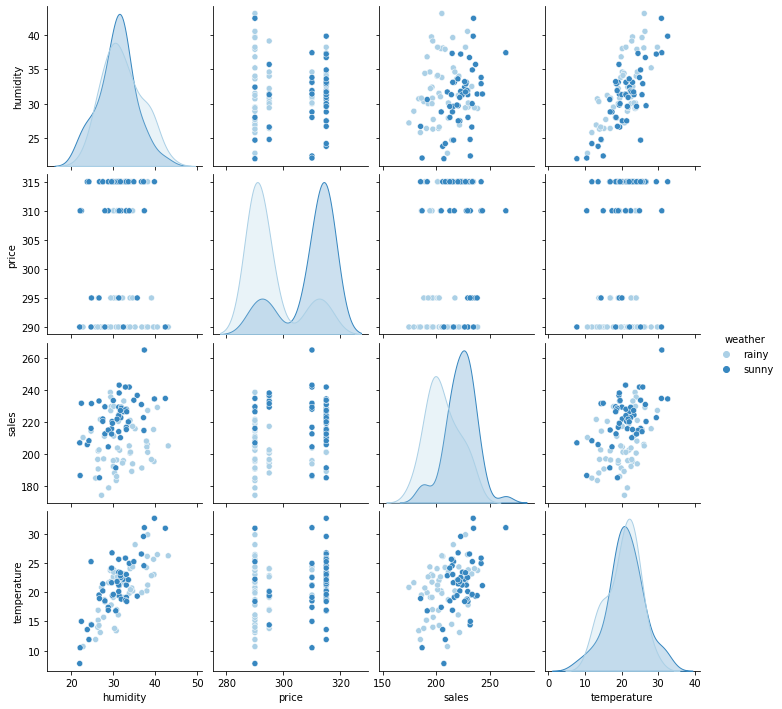

In [132]:
sns.pairplot(data=sales, hue='weather',palette='Blues')

In [133]:
lm = smf.ols('sales ~ price', sales).fit()
lm.params

## -> sales와 price가 양의 상관관계

Intercept    113.645406
price          0.332812
dtype: float64

In [134]:
# 분산분석표
# 잘못된 분석 : 가격이 오르면 매상도 증가
sm.stats.anova_lm(lm,typ=2)
## -> F통계량 0.02 -> 유의미함

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


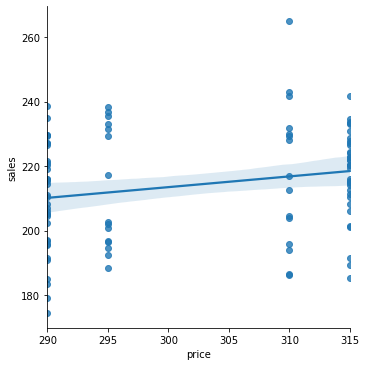

In [135]:
# 매상을 상품가격으로만 분석하여 문제의 소지 발생
# 날씨별로 보면 가격이 높아질 경우 매상이 줄어든다는 것을 알 수 있음
sns.lmplot(x='price',y='sales',data=sales)

## price와 sales만 보면 올라감

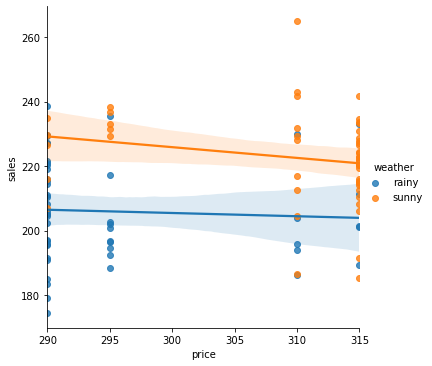

In [136]:
sns.lmplot(x='price',y='sales',data=sales,hue='weather')

## weather을 나눠서 보니까 price올라감에 따라 sales는 내려감.
## 따라서 변수를 적절하게 선택해야함.

In [137]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


In [138]:
# 독립변수가 4개인 모델 추정
lm_sales = smf.ols(
"sales ~ weather + humidity + temperature + price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [139]:
# 분산분석표
# 모든 독립변수가 유의미 : 잘못된 검정결과
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [140]:
### humidity와 temperature의 순서만 바꿨는데 무의미한 결과로 바뀜
lm_sales2 = smf.ols(
"sales ~ weather + temperature + humidity + price", data=sales).fit()
lm_sales2.params
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [141]:
# 분산분석 대신 회귀계수의 t검정 수행하면 문제는 발생되지 않음
# 검정 다중성의 문제 발생

# 귀무가설이 참인데 기각할 오류를 범할 확률이 올라감
# 여러번 대신에 한 번에 분산분석을 통해 개별 카테고리를 보지 않고 전체 한 번의 검정으로 판단

lm_sales.summary().tables[1] # 하나만 보기
## humidity 가 무의미한 것으로 나옴

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [142]:
lm_sales2.summary().tables[1] # 순서 바꾼 것도 t값은 그대로 나옴. 하지만 검정의 다중성 문제때문에 해결방법으로 쓸 수 없음!

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [143]:
# Type Ⅱ ANOVA
mod_full = smf.ols(
"sales ~ weather + humidity + temperature + price", sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3) # typ=2 로 해서 문제 해결
# t검정으로 하면 각각 해야하므로, 다중성 문제가 생기는데,
# 이렇게 하면 한 번에 하므로 다중성 문제 안생김
# 따라서 독립변수 여러개면 anova 사용(F검정)! (t검정 사용 XXXX)
# 그 중 typ = 2 사용

## humidity 는 유의미하지 않음.

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [144]:
# humidity 제거
mod_non_humi = smf.ols(
"sales ~ weather + temperature + price", sales).fit()
sm.stats.anova_lm(mod_non_humi,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [145]:
# 습도는 기온과 강한 상관관계가 있으며 기온이라는 독립변수가 포함되어 있으면
# 습도는 매상에 영향을 끼친다고 볼 수 없음.
mod_non_humi.summary().tables[1] # <- 이건 t검정할 때 보는거! 이제 볼 필요 없음!

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,273.3018,45.177,6.050,0.000,183.626,362.977
weather[T.sunny],20.3939,3.434,5.939,0.000,13.577,27.211
temperature,1.4179,0.292,4.859,0.000,0.839,1.997
price,-0.3260,0.154,-2.112,0.037,-0.632,-0.020


In [146]:
# 변수간 교유작용까지 보기 ( * ) / 독립변수가 여러개일 때는 이것도 봐야함.
mod_non_humi = smf.ols(
"sales ~ weather * temperature * price", sales).fit()
sm.stats.anova_lm(mod_non_humi,typ=2).round(3)

# sum_sq : 잔차의 제곱합 -> 변수늘어가면서 줄어들면 좋은 거

,sum_sq,df,F,PR(>F)
weather,6425.428,1.0,36.086,0.000
temperature,4278.061,1.0,24.026,0.000
weather:temperature,71.995,1.0,0.404,0.526
price,803.336,1.0,4.512,0.036
weather:price,96.890,1.0,0.544,0.463
temperature:price,390.204,1.0,2.191,0.142
weather:temperature:price,357.056,1.0,2.005,0.160
Residual,16381.404,92.0,NaN,NaN


## 정리  
  
Type Ⅰ ANOVA 검정방법  
- 복수의 독립변수를 가지는 경우 분산분석은 독립변수 1개씩 늘려가면서 독립변수가 늘어남으로써 감소한 잔차제곱합의 크기를 기반으로 독립변수 효과의 크기(분산분석표에서 sum_sq)를 계산
- 이 방법은 독립변수를 추가하는 순서에 따라서 sum_sq 값의 크기가 크게 바뀌며 유의미한지 여부도 변할 수 있음
- 독립변수가 여러 개 있을 경우 이 방법을 사용하면 잘못된 결과를 얻을 가능성 있음  
  
TypeⅡ ANOVA 검정방법
- 독립변수가 줄어들면서 증가하는 잔차제곱합의 크기에 기반해서 독립변수가 갖는 효과의 크기를 정량화 함
- 변수를 추가하는 순서를 바꾸어도 검정 결과는 달라지지 않음

- 독립변수간 강한 상관관계가 있을 때 나타나는 문제가 다중공선성. 기온과 습도간의 상관관계
- 상관관계가 강한 변수 중 어느 한쪽을 제거
- 다중공선성이 있으면 추정된 계수의 해석이 어려워지고 검정에서 얻은 p값 역시 해석이 어려움
- 리지회귀등을 이용함으로써 이런 문제를 완화할 수 있음